In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# import the dataset
data = pd.read_csv('realistic_user_behavior_dataset_1000.csv')

#view the first 5 lines
print("--- Aperçu des données ---")
print(data.head())
print("\nDimensions :", data.shape)
print("\nTypes de données :\n", data.dtypes)

--- Aperçu des données ---
   age  income  score  height  weight  visits  clicks  time_spent  target
0   39   59796  0.435   154.8    45.0       8       4         191       1
1   33   48031  0.709   164.3    63.9       5       4         366       0
2   41   45971  0.316   168.3    68.5       9       3         209       1
3   50   48756  0.508   189.0    94.7       9       5         314       0
4   32   35634  0.371   177.0    60.6      11       5         384       1

Dimensions : (1000, 9)

Types de données :
 age             int64
income          int64
score         float64
height        float64
weight        float64
visits          int64
clicks          int64
time_spent      int64
target          int64
dtype: object


In [15]:
# On vérifie les valeurs nulles
print("\nValeurs manquantes par colonne :\n", data.isna().sum())

# On remplace par la moyenne (méthode de cleaning.ipynb)
# Note : Ici on l'applique sur toutes les colonnes numériques
for col in data.columns:
    if data[col].isnull().any():
        data[col].fillna(data[col].mean(), inplace=True)
        print(f"Valeurs manquantes dans {col} remplacées par la moyenne.")


Valeurs manquantes par colonne :
 age           0
income        0
score         0
height        0
weight        0
visits        0
clicks        0
time_spent    0
target        0
dtype: int64


In [16]:
# Vérification et suppression
print("\nNombre de doublons :", data.duplicated().sum())
data.drop_duplicates(inplace=True)


Nombre de doublons : 0



Description statistique :
                age         income        score       height      weight  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.00000   
mean     34.812000   42433.235000     0.472451   171.846000    71.52130   
std       9.462991   16343.081256     0.148494     9.200383    14.64087   
min      18.000000    8000.000000     0.000000   150.000000    45.00000   
25%      28.000000   31268.250000     0.362000   165.375000    61.50000   
50%      35.000000   40328.500000     0.471500   172.000000    71.40000   
75%      41.000000   51475.750000     0.576250   178.000000    81.70000   
max      65.000000  112113.000000     0.862000   200.000000   128.70000   

            visits       clicks   time_spent       target  
count  1000.000000  1000.000000  1000.000000  1000.000000  
mean      9.256000     5.561000   371.404000     0.290000  
std       3.595747     2.755335   145.022123     0.453989  
min       1.000000     0.000000    30.000000     0.00000

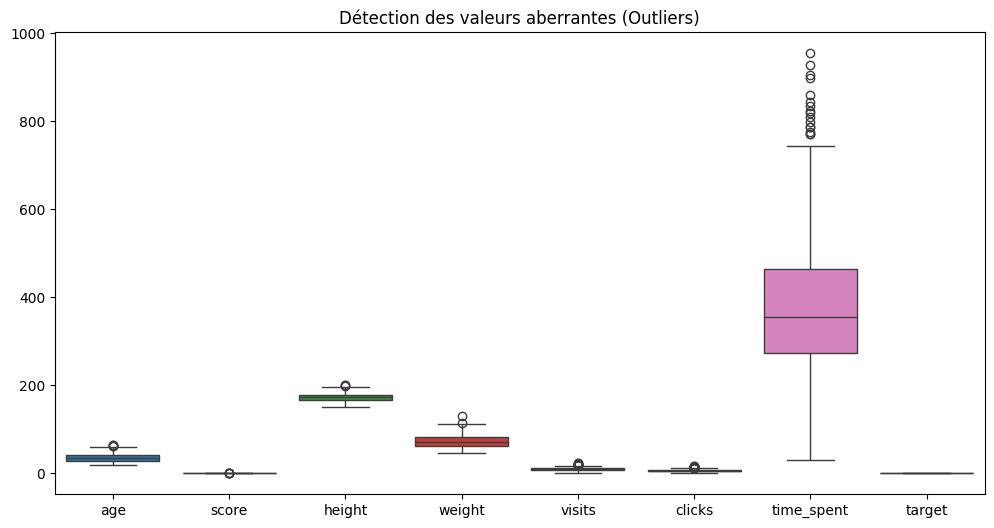

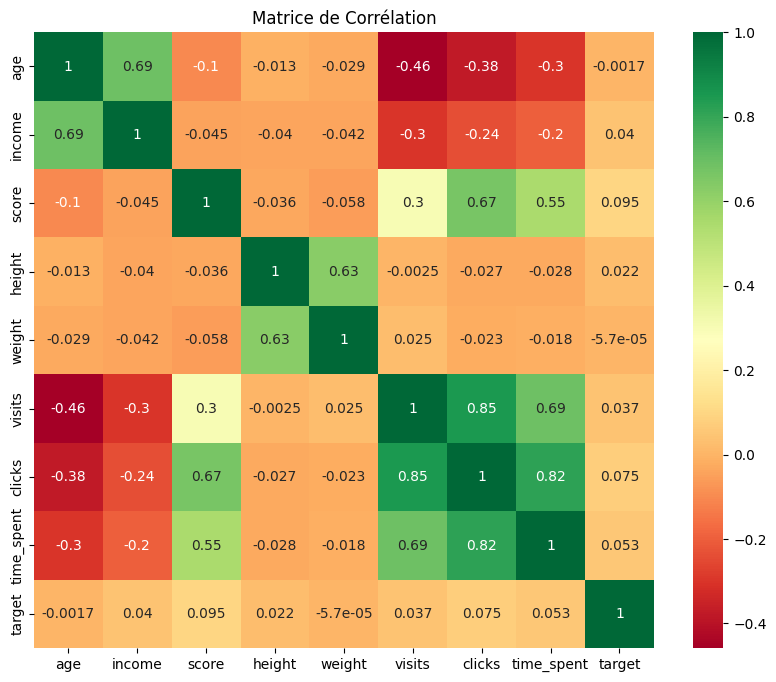

In [17]:
print("\nDescription statistique :\n", data.describe()) #

# Boxplot pour détecter les outliers (Comme à la fin de cleaning.ipynb)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop('income', axis=1)) # On enlève 'income' car l'échelle est trop grande
plt.title("Détection des valeurs aberrantes (Outliers)")
plt.show()

# Heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.title("Matrice de Corrélation")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, RocCurveDisplay
# 3. Séparation des variables
X = data.drop('target', axis=1)
y = data['target']

In [19]:
# 4. Division Train/Test (comme dans le notebook SVM)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [20]:
# 5. Feature Scaling (Étape critique pour le SVM)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [21]:
# 6. Création et entraînement du modèle SVM
# On utilise le noyau 'linear' ou 'rbf' comme dans votre exemple
classifier = SVC(kernel='linear', random_state=0, probability=True)
classifier.fit(X_train_sc, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [22]:
# 7. Évaluation du modèle
y_pred = classifier.predict(X_test_sc)

print("--- Performance du Modèle ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

--- Performance du Modèle ---
Accuracy Score: 0.684

Classification Report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81       171
           1       0.00      0.00      0.00        79

    accuracy                           0.68       250
   macro avg       0.34      0.50      0.41       250
weighted avg       0.47      0.68      0.56       250



e:\ING5\big_data\pratique\PythonDS\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\ING5\big_data\pratique\PythonDS\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\ING5\big_data\pratique\PythonDS\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

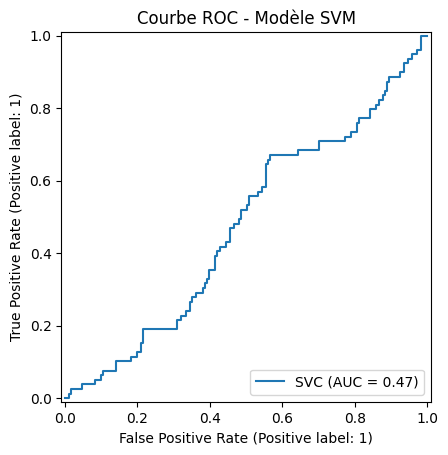

In [23]:
# 8. Visualisation : Courbe ROC (Comme dans la dernière cellule de votre notebook)
RocCurveDisplay.from_estimator(classifier, X_test_sc, y_test)
plt.title("Courbe ROC - Modèle SVM")
plt.show()

Variables sélectionnées pour l'optimisation : ['score', 'clicks', 'time_spent', 'income', 'visits']

Meilleur AUC atteint : 0.56


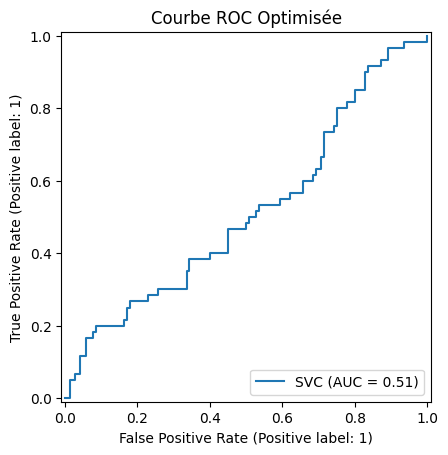

In [24]:
#3. Sélection automatique des variables (Feature Selection)
from sklearn.model_selection import train_test_split, GridSearchCV

# On calcule la corrélation absolue avec la cible 'target'
correlations = data.corr()['target'].abs().sort_values(ascending=False)

# On garde la target + les 5 variables les plus corrélées (pour éviter le bruit)
top_features = correlations.index[1:6].tolist() 
print(f"Variables sélectionnées pour l'optimisation : {top_features}")

X = data[top_features]
y = data['target']

# 4. Split et Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# 5. Optimisation par GridSearch (Pour booster l'AUC)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'sigmoid']
}

# On utilise scoring='roc_auc' pour que l'ordinateur cherche l'AUC maximum
grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, scoring='roc_auc', cv=5)
grid.fit(X_train_sc, y_train)
best_svm = grid.best_estimator_

""" # 6. Sauvegarde du modèle final et du scaler
best_svm = grid.best_estimator_
with open('model_final.pkl', 'wb') as f:
    pickle.dump({'model': best_svm, 'scaler': scaler, 'features': top_features}, f)
 """
# 7. Affichage du résultat final
print(f"\nMeilleur AUC atteint : {grid.best_score_:.2f}")
RocCurveDisplay.from_estimator(best_svm, X_test_sc, y_test)
plt.title("Courbe ROC Optimisée")
plt.show()

In [26]:
# 9. Sauvegarde du modèle
import pickle
with open('model_final.pkl', 'wb') as f:
    pickle.dump({'model': best_svm, 'scaler': scaler, 'features': top_features}, f)